In [1]:
# Wczytanie danych
import pandas as pd

df = pd.read_csv("Churn_Modelling.csv", sep=",", header=0)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [2]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Przygotowanie danych

In [3]:
# Zamiana na wartosci numeryczne  "Age",
df = df.drop(["RowNumber", "CustomerId", "Surname", "Tenure"], axis=1)

df = df.dropna()


df = pd.get_dummies(df)
df.head()


,CreditScore,Age,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [4]:
# Podział danych
from sklearn.model_selection import train_test_split as tts

X = df.drop(["Exited", "Gender_Female", "Geography_Germany"], axis=1)
y = df["Exited"]

X_train, X_test, y_train, y_test = tts(X, y, random_state=1)


In [5]:
# Normalizacja
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

pd.DataFrame(X_train).describe()


e:\kurs-ml\venv\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
e:\kurs-ml\venv\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  import sys
e:\kurs-ml\venv\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  


,0,1,2,3,4,5,6,7,8,9
count,7.500000e+03,7.500000e+03,7.500000e+03,7.500000e+03,7.500000e+03,7.500000e+03,7.500000e+03,7.500000e+03,7.500000e+03,7.500000e+03
mean,2.425319e-16,7.768601e-17,1.871096e-16,-6.631732e-17,5.873820e-17,1.383190e-16,5.305386e-17,-2.226367e-17,4.642213e-17,1.307399e-16
std,1.000067e+00,1.000067e+00,1.000067e+00,1.000067e+00,1.000067e+00,1.000067e+00,1.000067e+00,1.000067e+00,1.000067e+00,1.000067e+00
min,-3.091930e+00,-2.000523e+00,-1.228601e+00,-9.109494e-01,-1.556128e+00,-1.016944e+00,-1.735611e+00,-9.992003e-01,-5.732446e-01,-1.089599e+00
25%,-6.914572e-01,-6.595272e-01,-1.228601e+00,-9.109494e-01,-1.556128e+00,-1.016944e+00,-8.530407e-01,-9.992003e-01,-5.732446e-01,-1.089599e+00
50%,9.110122e-03,-1.806002e-01,3.309739e-01,-9.109494e-01,6.426209e-01,9.833388e-01,-8.054682e-03,-9.992003e-01,-5.732446e-01,9.177686e-01
75%,6.993750e-01,4.898976e-01,8.191080e-01,8.009324e-01,6.426209e-01,9.833388e-01,8.517570e-01,1.000800e+00,-5.732446e-01,9.177686e-01
max,2.059300e+00,5.087597e+00,2.796581e+00,4.224696e+00,6.426209e-01,9.833388e-01,1.735679e+00,1.000800e+00,1.744456e+00,9.177686e-01


In [12]:
# import klasy MPLClassifier oraz tranowanie
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=7, solver='lbfgs', activation='tanh', 
                    learning_rate_init=0.001, max_iter=500, learning_rate='adaptive')

mlp.fit(X_train, y_train)

# Wyniki
mlp.score(X_test, y_test)

0.87









# Testowanie parametrów

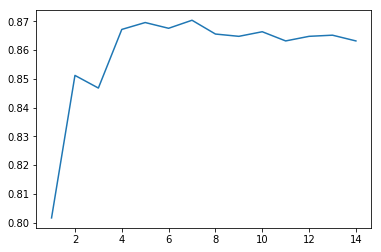

In [7]:
scores = []
neurons = []
for i in range(1,15):
    mlp = MLPClassifier(hidden_layer_sizes=i, activation='tanh',  solver='lbfgs', 
                        learning_rate_init=0.001, max_iter=300, learning_rate='adaptive')
    mlp.fit(X_train, y_train)
    score = mlp.score(X_test, y_test)
    scores.append(score)
    neurons.append(i)

# Wyświetlanie
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(neurons, scores)